<a href="https://colab.research.google.com/github/spriyam095/LeuronN/blob/master/Review%20Sentiment%20Analysis/Review_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`Review Sentiment Analysis`**

### **Mounting Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


### **Importing our data.**

In [0]:
import pandas as pd

data = pd.read_excel('/content/drive/My Drive/append1.xlsx')

## **Viewing the Data**

In [4]:
data.head()

,web_pid,title,text,rating,text.1,sentiment
0,B0725RDJCQ,Five Stars,"Very good quality and ordered L, it fits as ex...",5,"Five StarsVery good quality and ordered L, it ...",Positive
1,B0725RDJCQ,The quality of fabrics is not good. According ...,The quality of fabrics is not good . According...,3,The quality of fabrics is not good. According ...,Neutral
2,B0725RDJCQ,Very good,I ordered this from paytm .good quality produc...,4,Very goodI ordered this from paytm .good quali...,Positive
3,B0725RDJCQ,Bad quality,Product looks same as in the image but its not...,2,Bad qualityProduct looks same as in the image ...,Negative
4,B071H63TH5,Very bad print and 3rd clasd,Print very bad,1,Very bad print and 3rd clasdPrint very bad,Negative


In [5]:
data.describe()

,rating
count,11772.000000
mean,3.473242
std,1.523039
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


In [6]:
data.count()

web_pid      11772
title        11771
text         11758
rating       11772
text.1       11772
sentiment    11772
dtype: int64

## Removing columns like Title, text.

In [0]:
data = data.drop('title', axis=1)
data = data.drop('text', axis=1)


In [8]:
data

,web_pid,rating,text.1,sentiment
0,B0725RDJCQ,5,"Five StarsVery good quality and ordered L, it ...",Positive
1,B0725RDJCQ,3,The quality of fabrics is not good. According ...,Neutral
2,B0725RDJCQ,4,Very goodI ordered this from paytm .good quali...,Positive
3,B0725RDJCQ,2,Bad qualityProduct looks same as in the image ...,Negative
4,B071H63TH5,1,Very bad print and 3rd clasdPrint very bad,Negative
...,...,...,...,...
11767,B07CN14HW8,4,Four StarsExcellent...,Positive
11768,B07CN14HW8,4,Four StarsGood product,Positive
11769,B07CN14HW8,5,"Good productAwesome product, liked very much. ...",Positive
11770,B07CN14HW8,4,Four StarsGood product acording to price range...,Positive


In [9]:
len(data)-data.count()

web_pid      0
rating       0
text.1       0
sentiment    0
dtype: int64

## `Plotiing our data to get the figures.

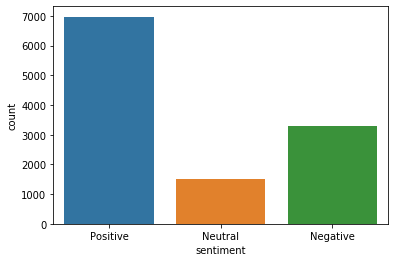

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=data)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


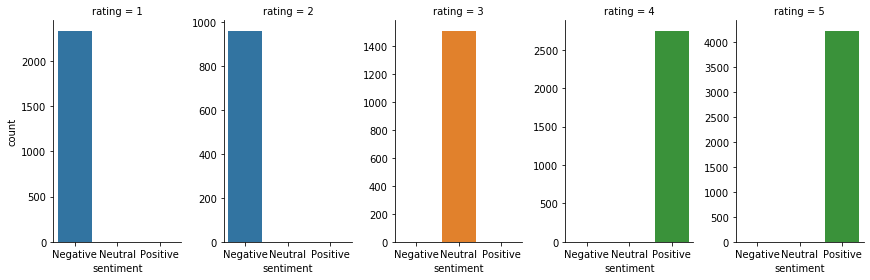

In [11]:
sns.factorplot(x='sentiment', data=data, order=['Negative','Neutral','Positive'], kind='count', col='rating', size=4, aspect=0.6, sharex=False, sharey=False)
plt.show()

# Downloading nltk package

In [12]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

# Extracting Features

In [0]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
data.columns = ['web_pid','rating','text','sentiment']
data.head()

,web_pid,rating,text,sentiment
0,B0725RDJCQ,5,"Five StarsVery good quality and ordered L, it ...",Positive
1,B0725RDJCQ,3,The quality of fabrics is not good. According ...,Neutral
2,B0725RDJCQ,4,Very goodI ordered this from paytm .good quali...,Positive
3,B0725RDJCQ,2,Bad qualityProduct looks same as in the image ...,Negative
4,B071H63TH5,1,Very bad print and 3rd clasdPrint very bad,Negative


**Preprocessing training data**

In [0]:
#Removing words starting with @ symbol
data['text']=data['text'].map(lambda x: re.sub('@\w*', '', str(x)))

#Removing words starting with http
data['text']=data['text'].map(lambda x: re.sub('http.*', '', str(x)))

#Removing date & time (numeric values)
data['text']=data['text'].map(lambda x: re.sub('[0-9]','', str(x)))

#Removing special characters
data['text']=data['text'].map(lambda x: re.sub('[@|#|$|%|^|&|/|\\|:|]','',str(x)))


### `Checking null values and replacing it with "ok"`

In [16]:
data.text.fillna('ok')
data.isnull().any(axis=0)

web_pid      False
rating       False
text         False
sentiment    False
dtype: bool

**Removing Stopwords & tokenizing data**

In [0]:
#Removing stopwords
stop = stopwords.words('english')
text=[]
empty=data['text'].map(lambda x: text.append(' '.join([word for word in str(x).strip().split() if word not in set(stop)])))

#Tokenizig
tfidf = TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None)
x_features = tfidf.fit_transform(text).toarray()


### Checking shape of our training data

In [18]:
x_features.shape

(11772, 10194)

### Viewing our tokenized training data

In [19]:
#Viewing our tokenized training data
print(x_features[0,700:800])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.24896905 0.        ]


In [20]:
#checking our data
import numpy as np

np.isfinite(x_features.all())

True

### Getting our training labels seperately

In [0]:
y = data['sentiment']
y=pd.DataFrame(y, columns=['sentiment'])
y = y['sentiment'].map({'Neutral':1,'Negative':2,'Positive':0})


In [22]:
y

0        0
1        1
2        0
3        2
4        2
        ..
11767    0
11768    0
11769    0
11770    0
11771    2
Name: sentiment, Length: 11772, dtype: int64

In [23]:
np.isfinite(y.all())

True

### Checking NAN in training data

In [24]:
print(np.argwhere(np.isnan(x_features)))

[]


## Converting labels to one hot encoder

In [0]:
from sklearn.preprocessing import OneHotEncoder

In [0]:
#Extracting values from y and reshaping it.
target = y.values
target = target.reshape(-1,1)

In [27]:
#Printing target values
target

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [2]])

In [28]:
#Converting into One Hot Encoder

ohe = OneHotEncoder()
target = ohe.fit_transform(target).toarray()
target

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [29]:
#Changing Column names as 0->Positive, 1->Neutral & 2->Negative

target=pd.DataFrame(data=target,columns=['Positive','Neutral','Negative'])
target.head()

,Positive,Neutral,Negative
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


# **Builting and training the Model**

In [30]:
#importing libraries
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [35]:
#Builting the model with layers

model = Sequential()
model.add(Dense(units=5012, activation='relu',kernel_initializer='uniform',kernel_regularizer=regularizers.l2(0.001),input_dim=10194))
model.add(Dense(units=5012, activation='relu',kernel_initializer='uniform',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(units=5012, activation='relu',kernel_initializer='uniform',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(units=3, activation='softmax',kernel_initializer='uniform'))

#Compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#Training the model
history=model.fit(x_features,target,batch_size=64,epochs=8,validation_split=0.25,verbose=1)

Train on 8829 samples, validate on 2943 samples
Epoch 1/8
8829/8829 [==============================] - 307s 35ms/step - loss: 11.4682 - acc: 0.8639 - val_loss: 0.6840 - val_acc: 0.8926
Epoch 2/8
8829/8829 [==============================] - 306s 35ms/step - loss: 0.4826 - acc: 0.9265 - val_loss: 0.5354 - val_acc: 0.8960
Epoch 3/8
8829/8829 [==============================] - 307s 35ms/step - loss: 0.3858 - acc: 0.9444 - val_loss: 0.5240 - val_acc: 0.8882
Epoch 4/8
8829/8829 [==============================] - 306s 35ms/step - loss: 0.3024 - acc: 0.9649 - val_loss: 0.5026 - val_acc: 0.8916
Epoch 5/8
8829/8829 [==============================] - 308s 35ms/step - loss: 0.2446 - acc: 0.9745 - val_loss: 0.4958 - val_acc: 0.8940
Epoch 6/8
8829/8829 [==============================] - 307s 35ms/step - loss: 0.2105 - acc: 0.9800 - val_loss: 0.5186 - val_acc: 0.8957
Epoch 7/8
8829/8829 [==============================] - 306s 35ms/step - loss: 0.1833 - acc: 0.9852 - val_loss: 0.4970 - val_acc: 0.8970

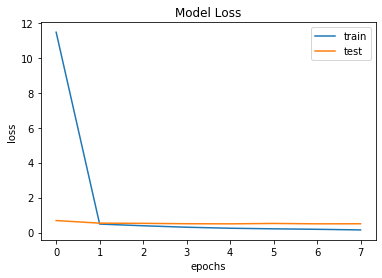

In [36]:
#Plotting Model Loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')

plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

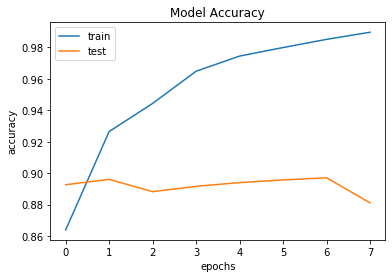

In [37]:
#Plotting Model Accuracy

plt.plot(history.history['acc'],label='train')
plt.plot(history.history['val_acc'],label='test')

plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Conclusion

*As one can say by looking at the results from the model that the model has high Variance. Therefore we make few changes (adding Dropout) in the model to reduce variance and train it again below.*

In [38]:
#Builting the model

model = Sequential()
model.add(Dense(units=5012, activation='relu',kernel_initializer='uniform',kernel_regularizer=regularizers.l2(0.006),input_dim=10194))
model.add(Dense(units=5012, activation='relu',kernel_initializer='uniform',kernel_regularizer=regularizers.l2(0.006)))
model.add(Dropout(0.5))
model.add(Dense(units=5012, activation='relu',kernel_initializer='uniform',kernel_regularizer=regularizers.l2(0.006)))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax',kernel_initializer='uniform'))

#Compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#EarlyStopping
es = EarlyStopping(verbose=1)

#Training the model
history=model.fit(x_features,target,batch_size=64,epochs=10,validation_split=0.15,verbose=1,callbacks=[es])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 10006 samples, validate on 1766 samples
Epoch 1/10
10006/10006 [==============================] - 341s 34ms/step - loss: 47.2441 - acc: 0.8445 - val_loss: 0.6887 - val_acc: 0.8958
Epoch 2/10
10006/10006 [==============================] - 369s 37ms/step - loss: 0.6582 - acc: 0.8898 - val_loss: 0.6569 - val_acc: 0.8873
Epoch 3/10
10006/10006 [==============================] - 373s 37ms/step - loss: 0.5787 - acc: 0.9024 - val_loss: 0.5752 - val_acc: 0.9003
Epoch 4/10
10006/10006 [==============================] - 369s 37ms/step - loss: 0.5184 - acc: 0.9133 - val_loss: 0.5286 - val_acc: 0.9032
Epoch 5/10
10006/10006 [==============================] - 372s 37ms/step - loss: 0.4738 - acc: 0.9194 - val_loss: 0.5206 - val_acc: 0.9020
Epoch 6/10
10006/10006 [==============================] - 381s 38ms/step - loss: 0.4353 - acc: 0.9275 - val_loss: 0.4831 - val_acc: 0.9088


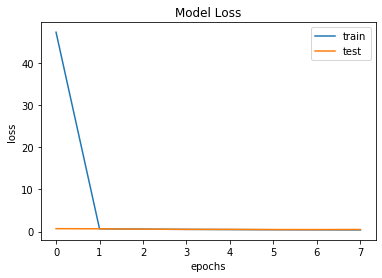

In [39]:
#Plotting the model Loss

plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')

plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

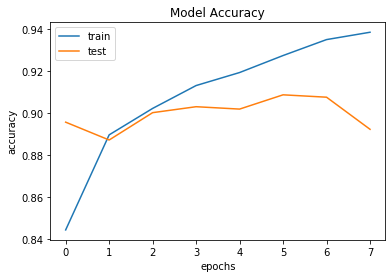

In [40]:
#Plotting Model Accuracy

plt.plot(history.history['acc'],label='train')
plt.plot(history.history['val_acc'],label='test')

plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Conclusion

The above model ow does not have variance problem but it seems to be biased to some features. And also we see that in both the cases our test accuracy does not changes much but revolves around .89. Therefore we may need more training data especially for *Neutral* & *Negative* Category 

# THE END